# The big Question

use machine learning to process and transform Titanic data to create a model. This model must predict which people are likely to survive with 80% or greater accuracy.

## A little dive into the data

- Two classes either True (1) and not False (0)
- supervised learning problem
- **Classification** problem since target is categorical
- 10 **features** 
- **target** variable is the Survived
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

To get full description  **[visit](https://data.world/nrippner/titanic-disaster-dataset)**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

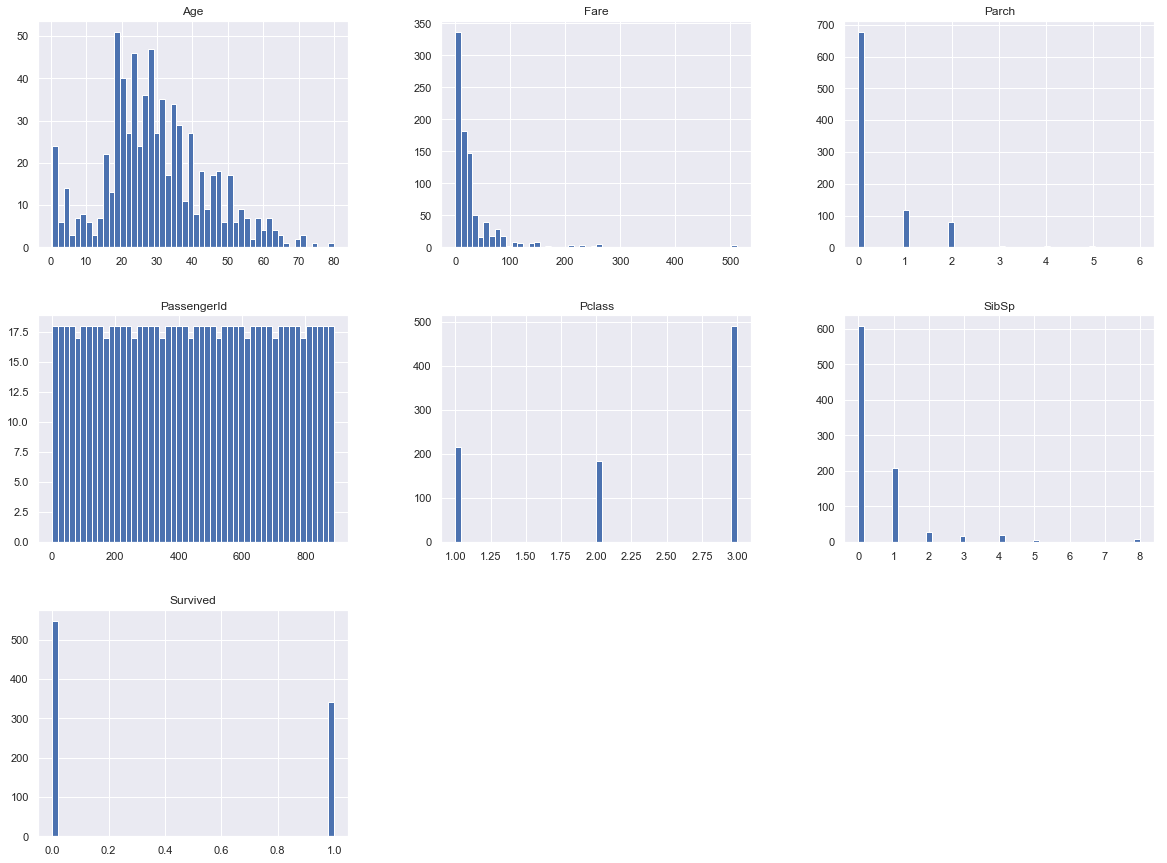

In [9]:
train.hist(bins=50, figsize=(20,15))
plt.show()

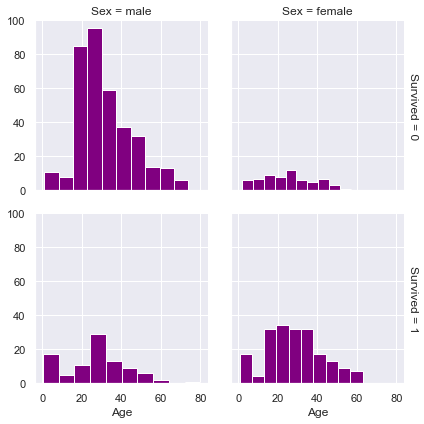

In [10]:
# relation of sex to survival
g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

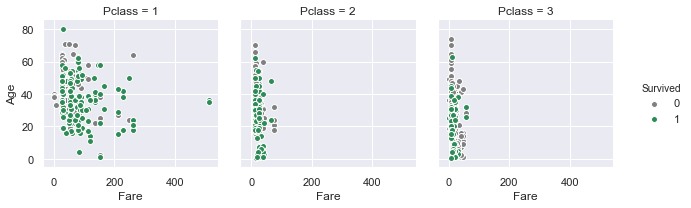

In [11]:
#relation of classes to survival
g = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

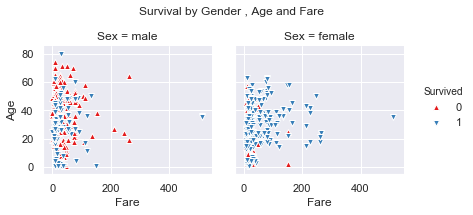

In [12]:
# relation of gender, age and fare to survival

g = sns.FacetGrid(train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

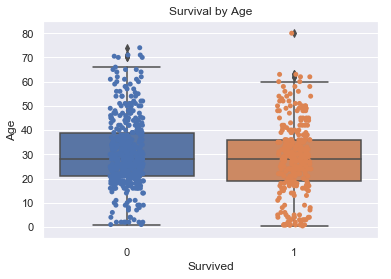

In [13]:
# relation of age to survival
ax = sns.boxplot(x="Survived", y="Age", 
                data=train)
ax = sns.stripplot(x="Survived", y="Age",
                   data=train, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Age",fontsize=12);

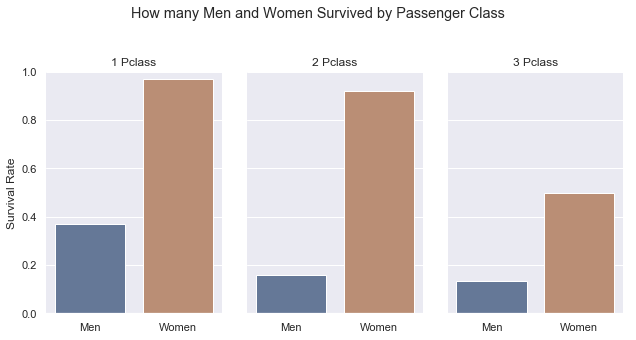

In [14]:
# relation of sex and class to survival
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');



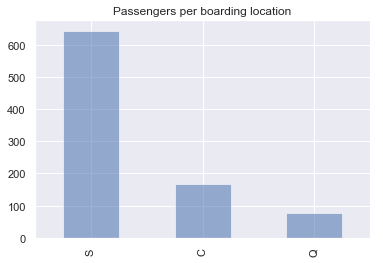

In [15]:
# relation of embarked to survival
train.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

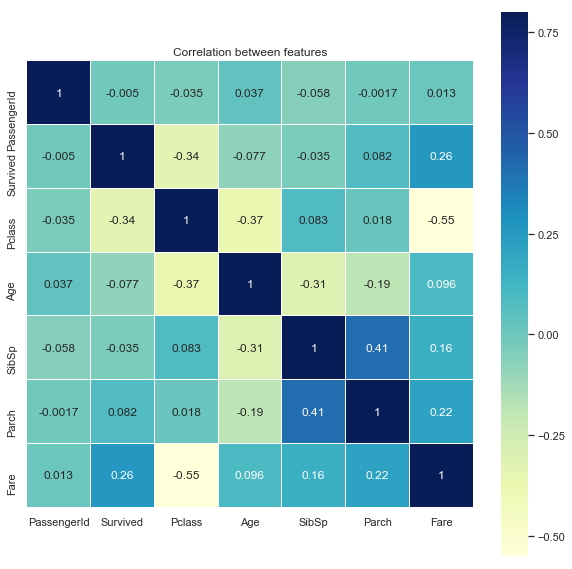

In [16]:
corr=train.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [17]:
#correlation of features with target variable
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## create extra attributes

how big is your family

In [18]:
def familySize(X):
    # Create a family size variable including the passenger themselves
    X["FamilySize"] = X["SibSp"] + X["Parch"]+1
    # Discretize family size
    X.loc[X["FamilySize"] == 1, "FsizeD"] = 'singleton'
    X.loc[(X["FamilySize"] > 1)  &  (X["FamilySize"] < 5) , "FsizeD"] = 'small'
    X.loc[X["FamilySize"] >4, "FsizeD"] = 'large'


In [19]:
familySize(train)
familySize(test)

do you have longer names

In [20]:
#Create feture for length of name 
# The .apply method generates a new series
def NameLength(X):
    X["NameLength"] = X["Name"].apply(lambda x: len(x))
    bins = [0, 20, 40, 57, 85]
    group_names = ['short', 'okay', 'good', 'long']
    X['NlengthD'] = pd.cut(X['NameLength'], bins, labels=group_names)


[okay, good, short, long]
Categories (4, object): [short < okay < good < long]


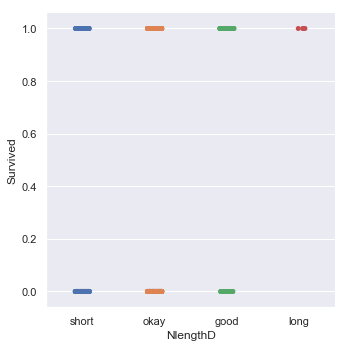

In [21]:
NameLength(train)
NameLength(test)
sns.catplot(x="NlengthD", y="Survived", data=train)
print(train["NlengthD"].unique())

whats in the name

In [22]:
import re
#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [23]:
#Get all the titles and print how often each one occurs.
titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Jonkheer      1
Mme           1
Don           1
Ms            1
Countess      1
Capt          1
Lady          1
Name: Name, dtype: int64


In [24]:
def title_class(X):
    #Add in the title column.
    titles = X["Name"].apply(get_title)
    X["Title"] = titles
    # Titles with very low cell counts to be combined to "rare" level
    rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
    # Also reassign mlle, ms, and mme accordingly
    X.loc[X["Title"] == "Mlle", "Title"] = 'Miss'
    X.loc[X["Title"] == "Ms", "Title"] = 'Miss'
    X.loc[X["Title"] == "Mme", "Title"] = 'Mrs'
    for rare in rare_title:
        X.loc[X["Title"] == rare, "Title"] = 'Rare Title'


In [25]:
title_class(train)
title_class(test)
train["Title"].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

ticket column

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'FsizeD',
       'NameLength', 'NlengthD', 'Title'],
      dtype='object')

In [27]:
train["Ticket"].tail()

886        211536
887        112053
888    W./C. 6607
889        111369
890        370376
Name: Ticket, dtype: object

In [28]:
def ticket_num(X):
    X["TicketNumber"] = X["Ticket"].str.extract('(\d{2,})', expand=True)
    X["TicketNumber"] = X["TicketNumber"].apply(pd.to_numeric)

In [29]:
ticket_num(train)
ticket_num(test)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
FamilySize      891 non-null int64
FsizeD          891 non-null object
NameLength      891 non-null int64
NlengthD        891 non-null category
Title           891 non-null object
TicketNumber    885 non-null float64
dtypes: category(1), float64(3), int64(7), object(7)
memory usage: 119.5+ KB


some rows in ticket column dont have numeric value so we got NaN there

## Handling missing data

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
FamilySize      891 non-null int64
FsizeD          891 non-null object
NameLength      891 non-null int64
NlengthD        891 non-null category
Title           891 non-null object
TicketNumber    885 non-null float64
dtypes: category(1), float64(3), int64(7), object(7)
memory usage: 119.5+ KB


In [32]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
FamilySize        0
FsizeD            0
NameLength        0
NlengthD          0
Title             0
TicketNumber      6
dtype: int64

In [33]:
test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
FamilySize        0
FsizeD            0
NameLength        0
NlengthD          0
Title             0
TicketNumber      2
dtype: int64

**missing categorical data in**
train: cabin and embarked
test: cabin
**missing numerical data in**
train: age
test: fare

## Handling missing categorical data

**embarked columnm**

In [34]:
#Lets check which rows have null Embarked column
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,singleton,19,short,Miss,113572.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,singleton,41,good,Mrs,113572.0


PassengerId 62 and 830 have missing embarked values

Both have Passenger class 1 and fare $80.

Lets plot a graph to visualize and try to guess from where they embarked

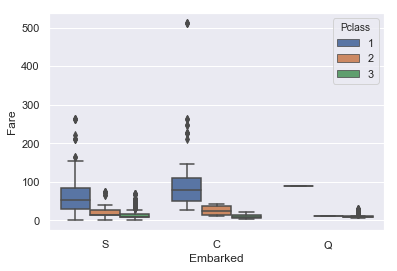

In [35]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train);

We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'

In [36]:
train["Embarked"] = train["Embarked"].fillna('C')

**Cabin column**

In [37]:
train["Deck"]=train.Cabin.str[0]
test["Deck"]=test.Cabin.str[0]
train["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [38]:
train.Deck.fillna('Z', inplace=True)
test.Deck.fillna('Z', inplace=True)
train["Deck"].unique() # Z is for null values

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

## Handling missing numerical data

**fare column**

In [39]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber,Deck
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,singleton,18,short,Mr,3701.0,Z


In [40]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

test=fill_missing_fare(test)

**TicketNumber column**

In [41]:
train.TicketNumber.fillna(train["TicketNumber"].median(), inplace=True)
test.TicketNumber.fillna(test["TicketNumber"].median(), inplace=True)


## Convert Categorical variables into Numerical ones

In [42]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for col in cat_vars:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,2,23,2,2,21171.0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,51,0,3,17599.0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,22,2,1,3101282.0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,2,44,0,3,113803.0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1,1,24,2,2,373450.0,8


**Age Column**

Age seems to be promising feature. So it doesnt make sense to simply fill null values out with median/mean/mode.

We will use Random Forest algorithm to predict ages.

In [43]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength',"NlengthD",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages   
    # All age values are stored in a target array
    y = train.values[:, 0]    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])   
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges    
    return df

In [44]:
train=fill_missing_age(train)
test=fill_missing_age(test)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null int32
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        891 non-null int32
FamilySize      891 non-null int64
FsizeD          891 non-null int32
NameLength      891 non-null int64
NlengthD        891 non-null int32
Title           891 non-null int32
TicketNumber    891 non-null float64
Deck            891 non-null int32
dtypes: float64(3), int32(6), int64(7), object(3)
memory usage: 111.5+ KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null object
Sex             418 non-null int32
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket          418 non-null object
Fare            418 non-null float64
Cabin           91 non-null object
Embarked        418 non-null int32
FamilySize      418 non-null int64
FsizeD          418 non-null int32
NameLength      418 non-null int64
NlengthD        418 non-null int32
Title           418 non-null int32
TicketNumber    418 non-null float64
Deck            418 non-null int32
dtypes: float64(3), int32(6), int64(6), object(3)
memory usage: 49.1+ KB


## Feature Scaling

We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions

In [47]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(train[['Age', 'Fare']])
train[['Age', 'Fare']] = std_scale.transform(train[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(test[['Age', 'Fare']])
test[['Age', 'Fare']] = std_scale.transform(test[['Age', 'Fare']])

## lets see the correlation of the features again

In [48]:
train.corr()["Survived"]

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.078496
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Title          -0.071174
TicketNumber   -0.096161
Deck           -0.301116
Name: Survived, dtype: float64

## train, val, test split

In [49]:
from sklearn.model_selection import train_test_split
predictors = ["Pclass", "Sex", "Fare", "Embarked","Deck","Age",
              "FsizeD", "NlengthD","Title","Parch"]
target="Survived"
X= train[predictors].values
y= train[target].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test= test[predictors].values

In [50]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)

(712, 10)
(179, 10)
(418, 10)
(712,)
(179,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score, classification_report 

In [58]:
X_train_prep= X_train
X_val_prep= X_val

## Creating ML models

In [59]:
estimators = [('log_reg', LogisticRegression()), 
         ('forest_clf', RandomForestClassifier()), ('svm_clf', SVC(probability= True)),
         ('sgd_clf' ,SGDClassifier(loss='log')), ('nb_clf', GaussianNB()), ('knn',KNeighborsClassifier()),
         ('xgboost', XGBClassifier())]

models = [('log_reg', LogisticRegression()), ('tree_clf', DecisionTreeClassifier()),
         ('forest_clf', RandomForestClassifier()), ('svm_clf', SVC(probability= True)),
         ('sgd_clf' ,SGDClassifier(loss='log')), ('nb_clf', GaussianNB()), ('knn',KNeighborsClassifier()),
         ('extra_clf' ,ExtraTreesClassifier()), ('ada_clf', AdaBoostClassifier()), 
         ('gb_clf', GradientBoostingClassifier()), ('bag_clf', BaggingClassifier()),
         ('lgb_clf', LGBMClassifier()), ('xgboost', XGBClassifier()), 
         ('voting_clf', VotingClassifier(estimators=estimators, voting='soft'))]

results= []
names= []
evale= []
cme= []
for name, model in models:
    model.fit(X_train_prep, y_train)
    joblib.dump(model, name +'.pkl')
    accuracy= model.score(X_train_prep, y_train)*100
    val_accuracy= model.score(X_val_prep, y_val)*100
    cv= cross_val_score(model, X_train_prep, y_train,
                            scoring='accuracy', cv=10)     
    y_pred = model.predict(X_val_prep)
    pre= precision_score(y_val, y_pred)
    recall= recall_score(y_val, y_pred)
    y_scores = model.predict_proba(X_val_prep)[:, 1]
    auc= roc_auc_score(y_val, y_scores)    
    results.append([accuracy, pre, recall, auc, cv])
    names.append(name)
    eval= "%s:\t%f\t%f\t%f\t%f\t%f\t%f (%f)" % (name, accuracy, val_accuracy, pre*100, recall*100, auc*100, cv.mean()*100, cv.std()*100)
    evale.append(eval)
    y_pred = model.predict(X_val_prep)
    c_matrix = confusion_matrix(y_val, y_pred)
    cme.append([name, c_matrix])

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\s

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None

In [60]:
print("""\t\t training\t validating
NAME\t\t ACCURACY\tACCURACY\tPRECISION\tRECALL\t\t   AUC\t\t CV_MEAN (CV_STD)""") 
print('='*117)
for eval in evale:
    print(eval)
    print('='*117)

		 training	 validating
NAME		 ACCURACY	ACCURACY	PRECISION	RECALL		   AUC		 CV_MEAN (CV_STD)
log_reg:	80.898876	81.005587	79.411765	72.972973	88.957529	80.471999 (7.174936)
tree_clf:	99.297753	78.770950	73.684211	75.675676	79.292149	74.331489 (6.524061)
forest_clf:	97.331461	81.564246	76.623377	79.729730	88.976834	80.622792 (6.148187)
svm_clf:	84.550562	82.681564	78.666667	79.729730	87.696268	82.430192 (6.667651)
sgd_clf:	78.792135	77.094972	78.947368	60.810811	87.586873	69.996647 (14.179836)
nb_clf:	77.247191	78.212291	73.972603	72.972973	86.679537	77.374860 (5.341721)
knn:	85.393258	80.446927	76.000000	77.027027	86.750322	78.384809 (5.671539)
extra_clf:	99.297753	83.798883	80.821918	79.729730	88.069498	79.233848 (4.873158)
ada_clf:	85.252809	82.122905	77.631579	79.729730	87.741313	82.430025 (5.907015)
gb_clf:	91.853933	81.564246	78.082192	77.027027	89.736165	82.731556 (5.136208)
bag_clf:	97.471910	83.798883	83.582090	75.675676	89.382239	80.067181 (3.845208)
lgb_clf:	97.050562	84.9162

In [61]:
for cm in cme:
    print(cm)
    print('='*75)

['log_reg', array([[91, 14],
       [20, 54]], dtype=int64)]
['tree_clf', array([[85, 20],
       [18, 56]], dtype=int64)]
['forest_clf', array([[87, 18],
       [15, 59]], dtype=int64)]
['svm_clf', array([[89, 16],
       [15, 59]], dtype=int64)]
['sgd_clf', array([[93, 12],
       [29, 45]], dtype=int64)]
['nb_clf', array([[86, 19],
       [20, 54]], dtype=int64)]
['knn', array([[87, 18],
       [17, 57]], dtype=int64)]
['extra_clf', array([[91, 14],
       [15, 59]], dtype=int64)]
['ada_clf', array([[88, 17],
       [15, 59]], dtype=int64)]
['gb_clf', array([[89, 16],
       [17, 57]], dtype=int64)]
['bag_clf', array([[94, 11],
       [18, 56]], dtype=int64)]
['lgb_clf', array([[92, 13],
       [14, 60]], dtype=int64)]
['xgboost', array([[88, 17],
       [14, 60]], dtype=int64)]
['voting_clf', array([[91, 14],
       [17, 57]], dtype=int64)]


C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better fo

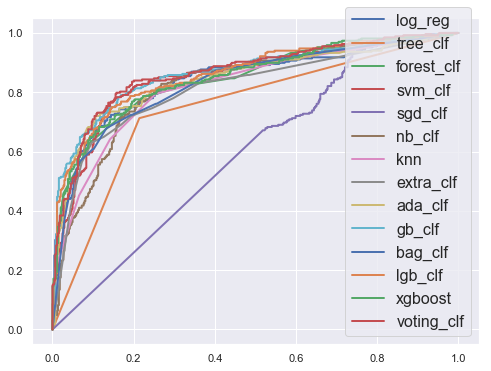

In [62]:
plt.figure(figsize=(8, 6))
for name, model in models:
    model.fit(X_train_prep, y_train)
    y_scores = cross_val_predict(model, X_train_prep, y_train, cv=3,
 method="predict_proba")[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train,y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.legend(loc="lower right", fontsize=16)
plt.show()


## the best model is lgb classifier

In [63]:
lgb_clf = joblib.load('lgb_clf.pkl')
lgb_clf.fit(X_train_prep, y_train)
y_pred = lgb_clf.predict(X_val_prep)
accuracy= metrics.accuracy_score(y_val, y_pred)
c_matrix = confusion_matrix(y_val, y_pred)
print(accuracy*100)
print(c_matrix)

84.91620111731844
[[92 13]
 [14 60]]


In [64]:
# print the first 25 true and predicted responses
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

True: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0]
Pred: [1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1]


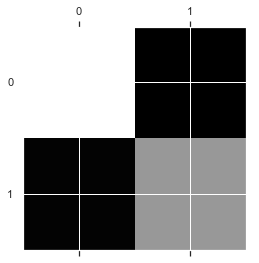

In [65]:
#lets take a look at image representation of the confusion matrix for RandomForestClassifier Model
#using the matplotlib's matshow() function

plt.matshow(c_matrix, cmap=plt.cm.gray)

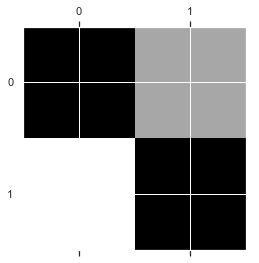

In [66]:
#focusing on only the errors
row_sums = c_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = c_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

from the representation shown above it shows that the lgbClassifier generalizes well, the error it is making mostly is predicting 1 when the true value is zero and sometimes predicting 0 when the true value is 1

In [67]:
from sklearn.metrics import classification_report 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

   micro avg       0.85      0.85      0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [68]:
y_scores = cross_val_predict(lgb_clf, X_train_prep, y_train, cv=3,
 method="predict_proba")[:, 1]

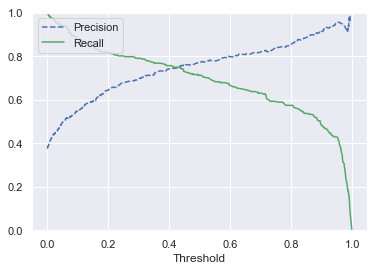

In [69]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

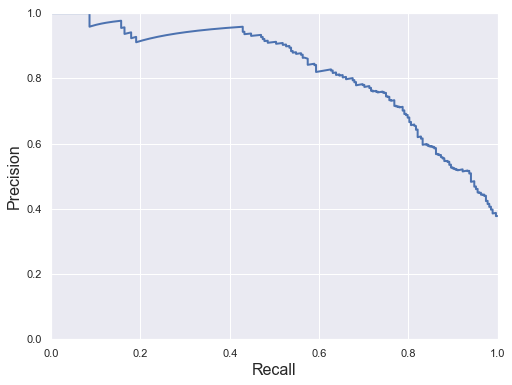

In [70]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

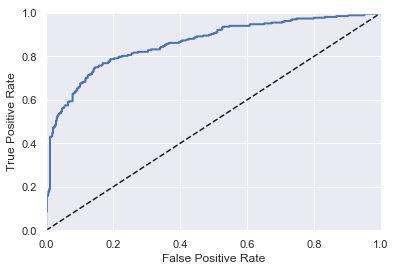

In [71]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

## Hyperparameter tuning for LGBClassifier

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ 'LGBM__learning_rate': [0.01,0.02],
                    'LGBM__n_estimators':  [1000], 
                    'LGBM__num_leaves':  [8,10],
                    'LGBM__bagging_fraction':  [0.7,0.8],
                    'LGBM__bagging_freq':  [1,2],                  
                   }
]

grid_search = GridSearchCV(lgb_clf, param_grid, cv=5,
                       scoring='precision_macro' ) #since we want more precision than recall
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'LGBM__learning_rate': [0.01, 0.02], 'LGBM__n_estimators': [1000], 'LGBM__num_leaves': [8, 10], 'LGBM__bagging_fraction': [0.7, 0.8], 'LGBM__bagging_freq': [1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision_macro', verbose=0)

In [73]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.7990917750305626
{'LGBM__bagging_fraction': 0.7, 'LGBM__bagging_freq': 1, 'LGBM__learning_rate': 0.01, 'LGBM__n_estimators': 1000, 'LGBM__num_leaves': 8}
LGBMClassifier(LGBM__bagging_fraction=0.7, LGBM__bagging_freq=1,
        LGBM__learning_rate=0.01, LGBM__n_estimators=1000,
        LGBM__num_leaves=8, boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)


In [94]:
#grid_search.best_estimator
y_pred = grid_search.best_estimator_.predict(X_val_prep)
print(classification_report(y_val, y_pred))
y_scores = grid_search.best_estimator_.predict_proba(X_val_prep)[:, 1]
print(roc_auc_score(y_val,y_scores))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

   micro avg       0.85      0.85      0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

0.9122265122265122


In [95]:

print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

True: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0]
Pred: [1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1]


In [96]:
final_model= grid_search.best_estimator_
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

## Submission

In [97]:
sub_train= pd.read_csv('train.csv')
sub_train, sub_val = train_test_split(sub_train, test_size=0.2, random_state=42)
sub_test= pd.read_csv('test.csv')

In [98]:
print(sub_train.shape)
print(sub_val.shape)
print(sub_test.shape)

(712, 12)
(179, 12)
(418, 11)


In [99]:
sub_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [100]:
pid_train= sub_train['PassengerId']
pid_val= sub_val['PassengerId']
pid_test= sub_test['PassengerId']

In [101]:
pid_val=pd.DataFrame(pid_val, columns=['PassengerId']).reset_index(drop=True)
y_preds= pd.DataFrame(y_pred, columns=['Survived'])

In [102]:
submission= pd.concat([pid_val, y_preds], axis=1)

In [103]:
submission.head()

,PassengerId,Survived
0,710,1
1,440,0
2,841,0
3,721,1
4,40,1


In [104]:
submission.to_csv('val_submission.csv', index= False)

In [105]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [106]:
pid_test=pd.DataFrame(pid_test, columns=['PassengerId']).reset_index(drop=True)
y_preds= pd.DataFrame(y_pred, columns=['Survived'])

In [107]:
submission= pd.concat([pid_test, y_preds], axis=1)

In [108]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [109]:
submission.to_csv('test_submission.csv', index= False)